In [3]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

In [4]:
# Import the data
df_adoption_data = pd.read_csv('pet_adoption_data.csv')
df_adoption_data.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [5]:
#drop PetID
df_adoption_data_reconfigure = df_adoption_data.drop(['PetID'], axis = 1)


df_adoption_data_reconfigure

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [6]:
df_adoption_data_reconfigure.columns

Index(['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [74]:
# get the features (everything except the "WeightKg" column
X = df_adoption_data_reconfigure.copy().drop(columns=["WeightKg", "Vaccinated", "HealthCondition", "PreviousOwner"])
X.head()
                                             

,PetID,PetType,Breed,AgeMonths,Color,Size,TimeInShelterDays,AdoptionFee,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,27,140,0
1,501,Rabbit,Rabbit,73,White,Large,8,235,0
2,502,Dog,Golden Retriever,136,Orange,Medium,85,385,0
3,503,Bird,Parakeet,97,White,Small,61,217,0
4,504,Rabbit,Rabbit,123,Gray,Large,28,14,0


In [76]:
#get the target column
y = df_adoption_data_reconfigure["WeightKg"]
y.head()

0     5.039768
1    16.086727
2     2.076286
3     3.339423
4    20.498100
Name: WeightKg, dtype: float64

In [77]:
#df_adoption_data_reconfigure['AdoptionLikelihood']

In [78]:
# Get the features (everything except the "price" column)
#X = df_adoption_data.copy().drop(columns="PreviousOwner")
#X.head()

In [79]:
#get the target column
#y = df_adoption_data["HealthCondition"]
#y.head()

In [82]:
#features = ["PetType", "Breed", "AgeMonths", 
#            "HealthCondition", "AdoptionLikelihood"]
#X = df_adoption_data_reconfigure[features]
#X.head()

In [83]:
#features = ["WeightKg"]
#y = df_adoption_data_reconfigure[features]
#y.head()

In [84]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
#review the x-train dataframe
X_train.head()

,PetType,Breed,AgeMonths,HealthCondition,AdoptionLikelihood
408,Dog,Golden Retriever,46,0,0
1619,Bird,Parakeet,119,0,1
1454,Bird,Parakeet,121,0,0
741,Bird,Parakeet,109,1,0
1682,Dog,Poodle,75,0,1


In [90]:
# Display X_test
X_test.head()

,PetType,Breed,AgeMonths,HealthCondition,AdoptionLikelihood
1960,Rabbit,Rabbit,116,0,0
526,Cat,Siamese,165,0,0
393,Cat,Siamese,106,1,0
1402,Rabbit,Rabbit,31,0,0
433,Rabbit,Rabbit,125,0,0


In [91]:
# Display y_train
y_train.head()

408     27.562114
1619    11.762077
1454    26.054690
741      7.589023
1682     7.173933
Name: WeightKg, dtype: float64

In [92]:
# Display y_test
y_test.head()

1960    29.186575
526     25.265161
393     13.956727
1402     6.641891
433     13.845579
Name: WeightKg, dtype: float64

<Axes: xlabel='PetType', ylabel='Breed'>

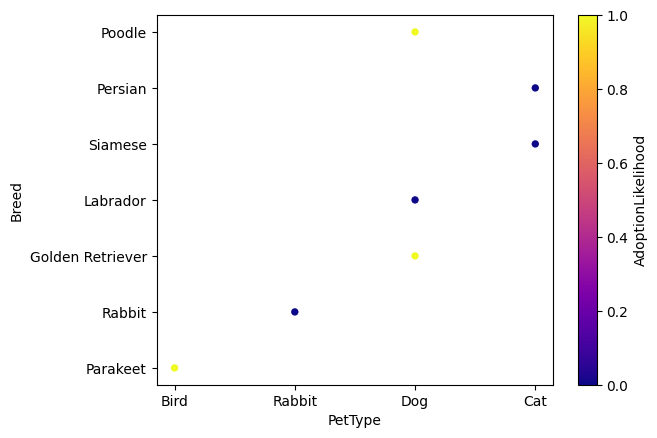

In [17]:
# Plot the data on a scatter plot
df_adoption_data.plot.scatter(
    x='PetType', 
    y='Breed', 
    c='AdoptionLikelihood', 
    marker='o', 
    s=40, 
    edgecolor= 'w',
    colormap="plasma"
)

In [43]:
df_adoption_data_reconfigure = pd.read_csv('pet_adoption_data.csv')
df_adoption_data_reconfigure.corr(numeric_only=True)

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
PetID,1.000000,-0.008464,0.034315,0.008808,0.010486,0.017683,0.010557,0.001339,0.049582
AgeMonths,-0.008464,1.000000,-0.029189,-0.001801,0.017200,0.036837,-0.038129,0.034943,-0.202209
WeightKg,0.034315,-0.029189,1.000000,0.022526,0.000708,-0.000980,-0.002367,-0.049155,0.017601
Vaccinated,0.008808,-0.001801,0.022526,1.000000,0.024079,-0.001123,0.021662,-0.011460,0.301311
HealthCondition,0.010486,0.017200,0.000708,0.024079,1.000000,-0.012664,-0.002537,0.013755,-0.244061
TimeInShelterDays,0.017683,0.036837,-0.000980,-0.001123,-0.012664,1.000000,-0.007104,0.007958,0.008867
AdoptionFee,0.010557,-0.038129,-0.002367,0.021662,-0.002537,-0.007104,1.000000,0.009755,-0.005486
PreviousOwner,0.001339,0.034943,-0.049155,-0.011460,0.013755,0.007958,0.009755,1.000000,-0.023065
AdoptionLikelihood,0.049582,-0.202209,0.017601,0.301311,-0.244061,0.008867,-0.005486,-0.023065,1.000000


In [19]:
df_adoption_data_reconfigure.HealthCondition.corr(df_adoption_data.TimeInShelterDays)

-0.012663548841906182

In [44]:
corr = stats.pearsonr(df_adoption_data_reconfigure.HealthCondition, df_adoption_data_reconfigure.WeightKg)
corr

PearsonRResult(statistic=0.0007084988286332552, pvalue=0.974694818111588)

In [45]:
corr_df_adoption_data_reconfigure = pd.DataFrame(columns=['r', 'p'])

for col in df_adoption_data:
    print(col)
    if pd.api.types.is_numeric_dtype(df_adoption_data_reconfigure[col]) and col != 'WeightKg':
        r, p =stats.pearsonr(df_adoption_data_reconfigure.HealthCondition, df_adoption_data_reconfigure[col])
        corr_df_adoption_data_reconfigure[col] = [round(r, 2), round(p, 2)]
corr_df_adoption_data

PetID
PetType
Breed
AgeMonths
Color
Size
WeightKg
Vaccinated
HealthCondition
TimeInShelterDays
AdoptionFee
PreviousOwner
AdoptionLikelihood


,r,p,PetID,AgeMonths,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,NaN,NaN,0.01,0.02,0.02,1.0,-0.01,-0.00,0.01,-0.24
1,NaN,NaN,0.64,0.44,0.28,0.0,0.57,0.91,0.54,0.00


In [46]:
# total of days spend in the shelter per breed
# using value_counts
Total_time_spend = df_adoption_data_reconfigure['TimeInShelterDays'].value_counts()
Total_time_spend


TimeInShelterDays
15    40
52    36
21    32
6     30
79    30
      ..
32    14
39    14
16    12
80    12
11     9
Name: count, Length: 89, dtype: int64

In [47]:
#Total days spend by all the pets
number_of_days_in_Shelter = df_adoption_data_reconfigure['TimeInShelterDays']
print(sum(number_of_days_in_Shelter))

88256


In [24]:
#Average days spend in the shelter before adoption
Average_day_in_Shelter = len(number_of_days_in_Shelter)
Average_day_in_Shelter


2007

In [25]:
avr = number_of_days_in_Shelter / Average_day_in_Shelter
avr

0       0.013453
1       0.003986
2       0.042352
3       0.030394
4       0.013951
          ...   
2002    0.032885
2003    0.029397
2004    0.033881
2005    0.029397
2006    0.004983
Name: TimeInShelterDays, Length: 2007, dtype: float64

In [48]:
df_adoption_data_reconfigure['AdoptionLikelihood']

0       0
1       0
2       0
3       0
4       0
       ..
2002    1
2003    0
2004    0
2005    0
2006    0
Name: AdoptionLikelihood, Length: 2007, dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
#verify the type of data from the dataset
df_adoption_data_reconfigure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [52]:
#one_hot_df.columns

In [29]:
#categorize all columns from the dataset for better reading
categorical_columns = df_adoption_data_reconfigure.select_dtypes(include=['float','int64','object']).columns.tolist()
categorical_columns

['PetType',
 'Breed',
 'AgeMonths',
 'Color',
 'Size',
 'WeightKg',
 'Vaccinated',
 'HealthCondition',
 'TimeInShelterDays',
 'AdoptionFee',
 'PreviousOwner',
 'AdoptionLikelihood']

In [30]:
encoder = OneHotEncoder(sparse_output=False)

In [56]:
encoded_df = encoder.fit_transform(df_adoption_data_reconfigure[categorical_columns])

In [55]:
one_hot_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_columns))
one_hot_df

,PetType_Bird,PetType_Cat,PetType_Dog,PetType_Rabbit,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,...,AdoptionFee_493,AdoptionFee_494,AdoptionFee_496,AdoptionFee_497,AdoptionFee_498,AdoptionFee_499,PreviousOwner_0,PreviousOwner_1,AdoptionLikelihood_0,AdoptionLikelihood_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2005,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
one_hot_df.columns

Index(['PetType_Bird', 'PetType_Cat', 'PetType_Dog', 'PetType_Rabbit',
       'Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Parakeet',
       'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit',
       ...
       'AdoptionFee_493', 'AdoptionFee_494', 'AdoptionFee_496',
       'AdoptionFee_497', 'AdoptionFee_498', 'AdoptionFee_499',
       'PreviousOwner_0', 'PreviousOwner_1', 'AdoptionLikelihood_0',
       'AdoptionLikelihood_1'],
      dtype='object', length=2795)

In [33]:
encoded_df.shape

(2007, 2795)

In [38]:
#get the features
features = ["PetType_Bird", "PetType_Cat", "PetType_Dog", "PetType_Rabbit", "Breed_Golden Retriever", "Breed_Labrador", "Breed_Parakeet", "Breed_Persian", "Breed_Poodle",
            "Breed_Rabbit", "AdoptionLikelihood_0", "AdoptionLikelihood_1"]
X = one_hot_df[features]
X.head()

,PetType_Bird,PetType_Cat,PetType_Dog,PetType_Rabbit,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,AdoptionLikelihood_0,AdoptionLikelihood_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [58]:
# now split the data into training sets again
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [59]:
# Preview X_train
X_train.head()

,PetType_Bird,PetType_Cat,PetType_Dog,PetType_Rabbit,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,AdoptionLikelihood_0,AdoptionLikelihood_1
1106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
#get the features
#features = ["PetType", "Breed", "AgeMonths", 'Size',
#            "HealthCondition", "AdoptionLikelihood"]
#X = one_hot_df[features]
#X.head()

In [60]:
#one_hot_df.set_index("Vaccinated")

In [36]:
features = ['Vaccinated', 'AdoptionFee_493','AdoptionFee_494','AdoptionFee_496', 'AdoptionFee_497', 'AdoptionFee_498','AdoptionFee_499', "PreviousOwner_0", 'PreviousOwner_1',  'AdoptionLikelihood_0', 'AdoptionLikelihood_1']
y = one_hot_df[features]
y.head()

KeyError: "['Vaccinated'] not in index"

In [81]:
#features = ["WeightKg", "Vaccinated", "AdoptionFee", "PreviousOwner", 'AdoptionLikelihood']
#y = df_adoption_data_reconfigure[features]
#y.head()

,WeightKg,Vaccinated,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,5.039768,1,140,0,0
1,16.086727,0,235,0,0
2,2.076286,0,385,0,0
3,3.339423,0,217,1,0
4,20.498100,0,14,1,0


In [35]:
#y = encoded_df['Vaccinated _yes']
#y.head()

In [82]:
#splitting into training and testing sets
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 6)
(803, 6)
(1204, 5)
(803, 5)


In [85]:
# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression


In [86]:
#model = LogisticRegression()

In [87]:
#model.fit(X_train,y_train)

In [88]:
# Create a `LogisticRegression` function 

logistic_regression_model = LogisticRegression()

In [89]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Rabbit'

In [90]:
# get the accuracy
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(prediction,y_test)

NameError: name 'prediction' is not defined